In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats.mstats import winsorize
import scipy.stats as stats

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
life.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [7]:
life.isnull().sum().sort_values(ascending = False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 BMI                                34
 thinness  1-19 years               34
 thinness 5-9 years                 34
Diphtheria                          19
Polio                               19
Adult Mortality                     10
Life expectancy                     10
under-five deaths                    0
 HIV/AIDS                            0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
Year                                 0
Country                              0
dtype: int64

In [8]:
columns = life.columns[3:]
columns

for i in columns:
    
    life[i] = life[i].fillna(life[i].mean())

In [9]:
life.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [10]:
life.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [11]:
life.loc[life['Status'] == 'Developing', 'Status'] = 0
life.loc[life['Status'] == 'Developed', 'Status'] = 1

In [12]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


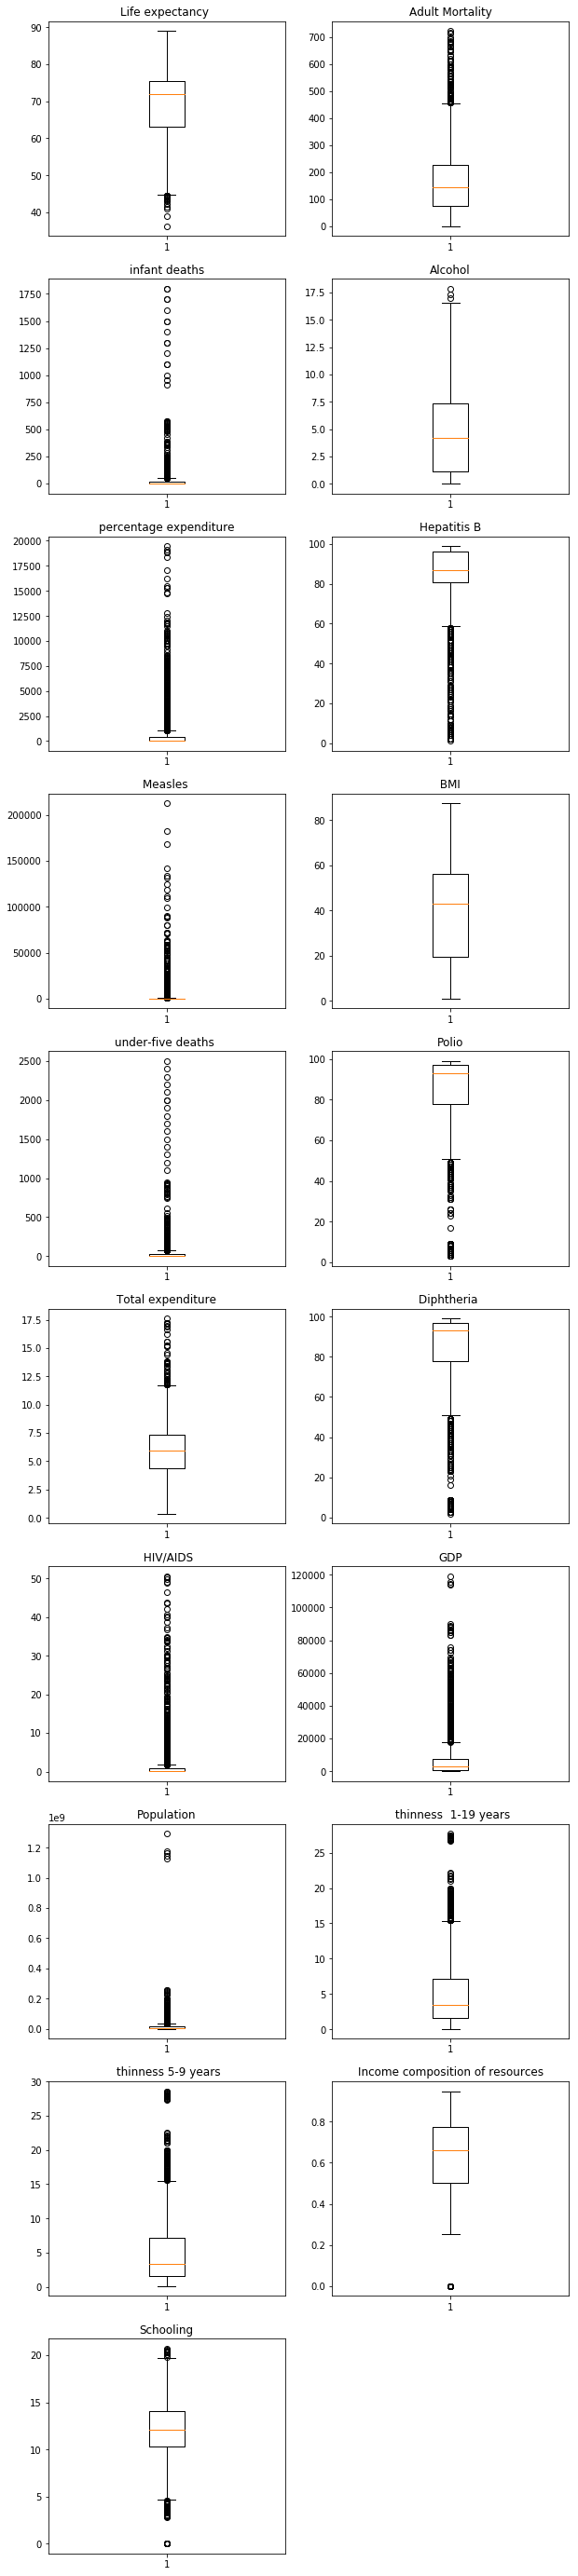

In [13]:
column = {'Life expectancy ': 1,
            'Adult Mortality': 2,
            'infant deaths': 3,
            'Alcohol': 4,
            'percentage expenditure': 5,
            'Hepatitis B': 6,
            'Measles ' : 7,
            ' BMI ': 8,
            'under-five deaths ' : 9,
            'Polio' : 10,
            'Total expenditure' :11, 
            'Diphtheria ': 12, 
            ' HIV/AIDS': 13, 
            'GDP': 14,
            'Population' : 15,
            ' thinness  1-19 years' : 16,
            ' thinness 5-9 years' : 17,
            'Income composition of resources' : 18,
            'Schooling' : 19,
           }

plt.figure(figsize = (10, 50))

for var, i in column.items():
    plt.subplot(10, 2, i)
    plt.boxplot(life[var], whis = 1.5)
    plt.title(var)

plt.show()

In [14]:
winsorized_Life_Expectancy = winsorize(life['Life expectancy '],(0.01, 0))

winsorized_Adult_Mortality = winsorize(life['Adult Mortality'],(0,0.03))

winsorized_Infant_Deaths = winsorize(life['infant deaths'],(0,0.10))

winsorized_Alcohol = winsorize(life['Alcohol'],(0,0.01))

winsorized_Percentage_Exp = winsorize(life['percentage expenditure'],(0,0.12))

winsorized_HepatitisB = winsorize(life['Hepatitis B'],(0.11,0))

winsorized_Measles = winsorize(life['Measles '],(0,0.19))

winsorized_Under_Five_Deaths = winsorize(life['under-five deaths '],(0,0.12))

winsorized_Polio = winsorize(life['Polio'],(0.09,0))

winsorized_Tot_Exp = winsorize(life['Total expenditure'],(0,0.01))

winsorized_Diphtheria = winsorize(life['Diphtheria '],(0.10,0))

winsorized_HIV = winsorize(life[' HIV/AIDS'],(0,0.16))

winsorized_GDP = winsorize(life['GDP'],(0,0.13))

winsorized_Population = winsorize(life['Population'],(0,0.14))

winsorized_thinness_1to19_years = winsorize(life[' thinness  1-19 years'],(0,0.04))

winsorized_thinness_5to9_years = winsorize(life[' thinness 5-9 years'],(0,0.04))

winsorized_Income_Comp_Of_Resources = winsorize(life['Income composition of resources'],(0.05,0))

winsorized_Schooling = winsorize(life['Schooling'],(0.02,0.01))

In [15]:
############

In [16]:
life['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
life['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
life['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
life['winsorized_Alcohol'] = winsorized_Alcohol
life['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
life['winsorized_HepatitisB'] = winsorized_HepatitisB
life['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
life['winsorized_Polio'] = winsorized_Polio
life['winsorized_Tot_Exp'] = winsorized_Tot_Exp
life['winsorized_Diphtheria'] = winsorized_Diphtheria
life['winsorized_HIV'] = winsorized_HIV
life['winsorized_GDP'] = winsorized_GDP
life['winsorized_Population'] = winsorized_Population
life['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
life['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
life['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
life['winsorized_Schooling'] = winsorized_Schooling
life['winsorized_Measles'] = winsorized_Measles

In [17]:
life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,winsorized_Measles
0,Afghanistan,2015,0,65.0,263.0,62,0.010000,71.279624,65.000000,1154,...,8.16000,65.0,0.1,584.259210,1.275338e+07,14.6,15.0,0.479,10.1,831
1,Afghanistan,2014,0,59.9,271.0,64,0.010000,73.523582,62.000000,492,...,8.18000,62.0,0.1,612.696514,3.275820e+05,14.6,15.0,0.476,10.0,492
2,Afghanistan,2013,0,59.9,268.0,66,0.010000,73.219243,64.000000,430,...,8.13000,64.0,0.1,631.744976,1.275338e+07,14.6,15.0,0.470,9.9,430
3,Afghanistan,2012,0,59.5,272.0,69,0.010000,78.184215,67.000000,2787,...,8.52000,67.0,0.1,669.959000,3.696958e+06,14.6,15.0,0.463,9.8,831
4,Afghanistan,2011,0,59.2,275.0,71,0.010000,7.097109,68.000000,3013,...,7.87000,68.0,0.1,63.537231,2.978599e+06,14.6,15.0,0.454,9.5,831
5,Afghanistan,2010,0,58.8,279.0,74,0.010000,79.679367,66.000000,1989,...,9.20000,66.0,0.1,553.328940,2.883167e+06,14.6,15.0,0.448,9.2,831
6,Afghanistan,2009,0,58.6,281.0,77,0.010000,56.762217,63.000000,2861,...,9.42000,63.0,0.1,445.893298,2.843310e+05,14.6,15.0,0.434,8.9,831
7,Afghanistan,2008,0,58.1,287.0,80,0.030000,25.873925,64.000000,1599,...,8.33000,64.0,0.1,373.361116,2.729431e+06,14.6,15.0,0.433,8.7,831
8,Afghanistan,2007,0,57.5,295.0,82,0.020000,10.910156,63.000000,1141,...,6.73000,63.0,0.1,369.835796,1.275338e+07,14.6,15.0,0.415,8.4,831
9,Afghanistan,2006,0,57.3,295.0,84,0.030000,17.171518,64.000000,1990,...,7.43000,58.0,0.1,272.563770,2.589345e+06,14.6,15.0,0.405,8.1,831


In [18]:
X= life[['winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_1to19_years', 'winsorized_thinness_5to9_years',
       'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling',
       'winsorized_Measles', 'Status']]

y = life['winsorized_Life_Expectancy']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [21]:
model = LinearRegression(fit_intercept = True, normalize = True).fit(X_train, y_train)
model.score(X_test, y_test)

0.8620800422664433

In [22]:
random = RandomForestRegressor()
random.fit(X_train, y_train)
random.score(X_test, y_test)

0.9503994016826989

In [23]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
tree.score(X_test, y_test)

0.9125814111587117

In [24]:
param_grid = [
    {'n_estimators': [10, 25],
     'max_features': [5, 10], 
     'max_depth': [10, 50, None],
     'bootstrap': [True, False]
    }
]

grid_search_forest = GridSearchCV(random, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 25], 'max_features': [5, 10], 'max_depth': [10, 50, None], 'bootstrap': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [25]:
grid_search_forest.best_params_

{'bootstrap': False, 'max_depth': None, 'max_features': 10, 'n_estimators': 25}

In [30]:
Random = RandomForestRegressor(bootstrap = False, max_depth = 50, max_features = 5, n_estimators = 25).fit(X_train, y_train)
Random.score(X_test, y_test)

0.9647692936660575

In [31]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [33]:
wml_credentials={
  "apikey": "*****************************************",
  "instance_id": "**************************************",
  "password": "***********************************",
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "username": "**************************************"
}

In [35]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [37]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Soham", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "sohamsahare123@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Life_expectancy"}

In [38]:
model_artifact =client.repository.store_model(Random, meta_props=model_props)

In [39]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [ ]:
# The code was removed by Watson Studio for sharing.